# *Exploratory Data Analysis of Supplement Sales and Revenue Trends*

# **Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings as w
w.filterwarnings("ignore")

# Data Loading

In [26]:
df =pd.read_csv("F:\Python project\Supplement Sales\Supplement_Sales_Weekly_Expanded.csv")

In [27]:
df.head(2)

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon


## Initial Data Inspection :

In [4]:
df.shape

(4384, 10)

In [144]:
# Descriptive Statistics (Numerical Features)

df.describe()

,Date,Units Sold,Price,Revenue,Discount,Units Returned,Return_rates,Net Revenue
count,4384,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,2022-08-18 12:00:00,150.200274,34.781229,5226.569446,0.124398,1.531478,1.018588,5173.488723
min,2020-01-06 00:00:00,103.000000,10.000000,1284.000000,0.000000,0.000000,0.000000,1251.900000
25%,2021-04-26 00:00:00,142.000000,22.597500,3349.372500,0.060000,1.000000,0.602410,3311.512500
50%,2022-08-18 12:00:00,150.000000,34.720000,5173.140000,0.120000,1.000000,0.729927,5122.580000
75%,2023-12-11 00:00:00,158.000000,46.712500,7009.960000,0.190000,2.000000,1.428571,6931.165000
max,2025-03-31 00:00:00,194.000000,59.970000,10761.850000,0.250000,8.000000,5.333333,10686.300000
std,NaN,12.396099,14.198309,2192.491946,0.071792,1.258479,0.833740,2170.857643


## Date Conversion

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4384 non-null   datetime64[ns]
 1   Product Name    4384 non-null   object        
 2   Category        4384 non-null   object        
 3   Units Sold      4384 non-null   int64         
 4   Price           4384 non-null   float64       
 5   Revenue         4384 non-null   float64       
 6   Discount        4384 non-null   float64       
 7   Units Returned  4384 non-null   int64         
 8   Location        4384 non-null   object        
 9   Platform        4384 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 342.6+ KB


In [9]:
# Missing Values & Duplicate Checks

df.isna().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [10]:
# Duplicate Records
df.duplicated().sum()

np.int64(0)

In [12]:
# Categorical Data Summary

df.describe(include='object')

,Product Name,Category,Location,Platform
count,4384,4384,4384,4384
unique,16,10,3,3
top,Whey Protein,Vitamin,Canada,iHerb
freq,274,822,1507,1499


In [16]:
# Daily Sales Aggregation

daily_sales = df.groupby('Date').agg({
    'Revenue' : 'sum',
    'Units Sold' : 'sum',
    'Units Returned' : 'sum'
}).reset_index()

In [17]:
daily_sales

,Date,Revenue,Units Sold,Units Returned
0,2020-01-06,71848.56,2406,19
1,2020-01-13,72416.18,2374,27
2,2020-01-20,76152.42,2370,26
3,2020-01-27,70306.73,2397,29
4,2020-02-03,98011.64,2384,34
...,...,...,...,...
269,2025-03-03,66065.44,2431,36
270,2025-03-10,92509.57,2411,30
271,2025-03-17,65590.53,2381,22
272,2025-03-24,69778.44,2416,27


## Daily Revenue Trend Visualization

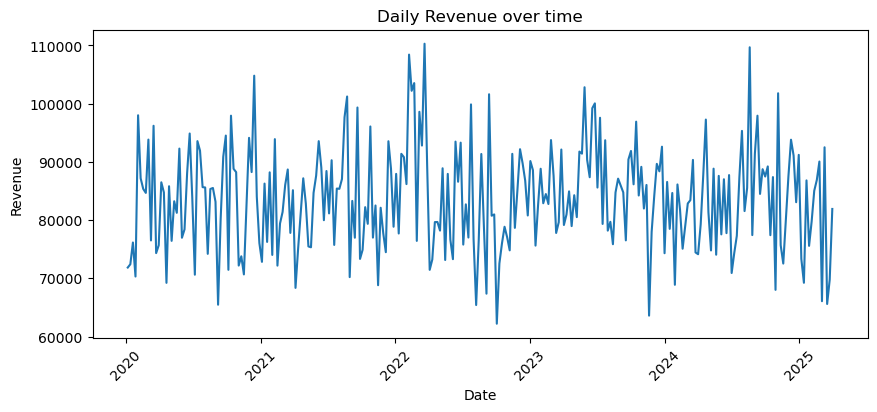

In [25]:

plt.figure(figsize=(10,4))
sns.lineplot(x='Date',y='Revenue',data= daily_sales)
plt.title('Daily Revenue over time')
plt.xticks(rotation=45)
plt.show()

# Revenue by Product Category

In [29]:
Category_Revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

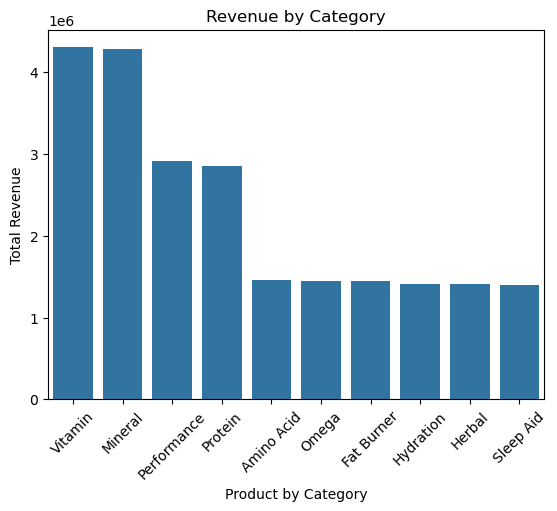

In [141]:
sns.barplot(x= Category_Revenue.index,y= Category_Revenue.values)
plt.title('Revenue by Category')
plt.xlabel('Product by Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation = 45)
plt.show()

In [44]:
Location_Platform = df.groupby(['Location','Platform'])['Revenue'].sum().unstack().fillna(0)

In [45]:
Location_Platform

Platform,Amazon,Walmart,iHerb
Location,,,
Canada,2613844.28,2518639.07,2716096.38
UK,2442671.23,2637066.25,2624222.86
USA,2612936.27,2232862.30,2514941.81


# Revenue by Location and Platform

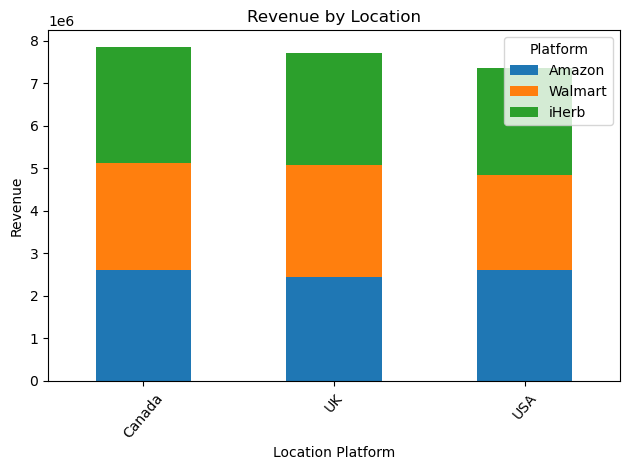

In [51]:
Location_Platform.plot(kind='bar',stacked=True)
plt.title("Revenue by Location")
plt.xlabel('Location Platform')
plt.ylabel('Revenue')
plt.xticks(rotation = 50)
plt.tight_layout()
plt.show( )

In [145]:
Top_Products = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).head(5)

In [61]:
Top_Products

Product Name
Biotin         1486798.62
Zinc           1482546.95
Pre-Workout    1477183.78
BCAA           1464819.63
Fish Oil       1451065.87
Name: Revenue, dtype: float64

# Top 5 Products by Revenue

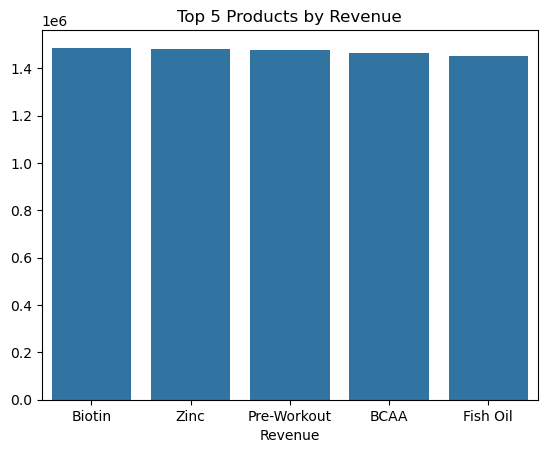

In [65]:
sns.barplot(x=Top_Products.index,y= Top_Products.values)
plt.title("Top 5 Products by Revenue")
plt.xlabel("Revenue")
plt.show()

## Return Rate Analysis

In [68]:
df["Return_rates"] = df['Units Returned']/ df['Units Sold']
df['Return_rates'] = df['Return_rates']*100

In [72]:
Category_Return = df.groupby('Category')['Return_rates'].mean().sort_values(ascending=False)

# Return rate by Product Category

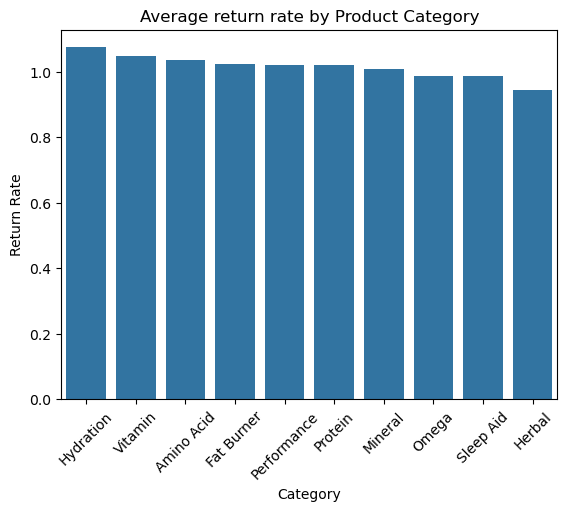

In [78]:
sns.barplot(x=Category_Return.index,y= Category_Return.values)
plt.title("Average return rate by Product Category")
plt.xlabel('Category')
plt.ylabel('Return Rate')
plt.xticks(rotation=45)
plt.show()

# Discount vs Revenue Analysis

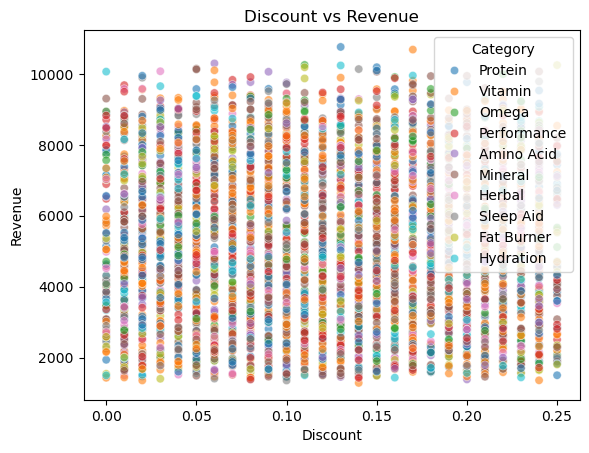

In [80]:
sns.scatterplot(data=df,x='Discount',y= 'Revenue',hue='Category',alpha=0.6)
plt.title('Discount vs Revenue')
plt.show()

In [87]:
# Correlation Analysis

correlation = df[['Units Sold','Revenue','Discount','Units Returned','Return_rates']].corr()

In [88]:
correlation

,Units Sold,Revenue,Discount,Units Returned,Return_rates
Units Sold,1.000000,0.210462,-0.010435,0.116523,0.015058
Revenue,0.210462,1.000000,-0.012531,0.012432,-0.008563
Discount,-0.010435,-0.012531,1.000000,0.004276,0.006069
Units Returned,0.116523,0.012432,0.004276,1.000000,0.991535
Return_rates,0.015058,-0.008563,0.006069,0.991535,1.000000


# Correlation Analysis on Heatmap

<Axes: >

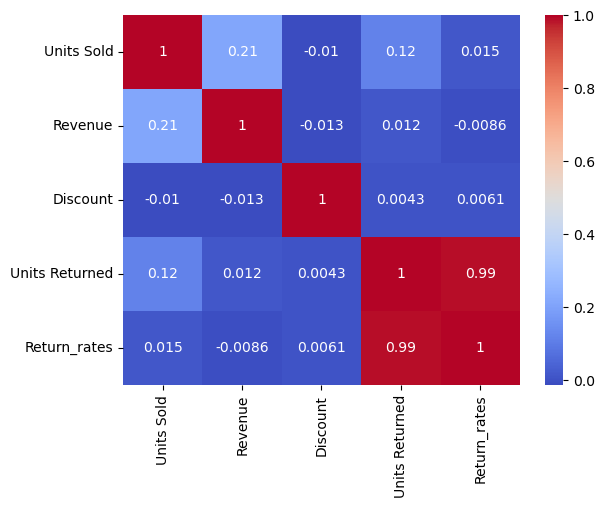

In [89]:
sns.heatmap(data=correlation,cmap='coolwarm',annot= True)

# Revenue Trend by Category (Interactive)

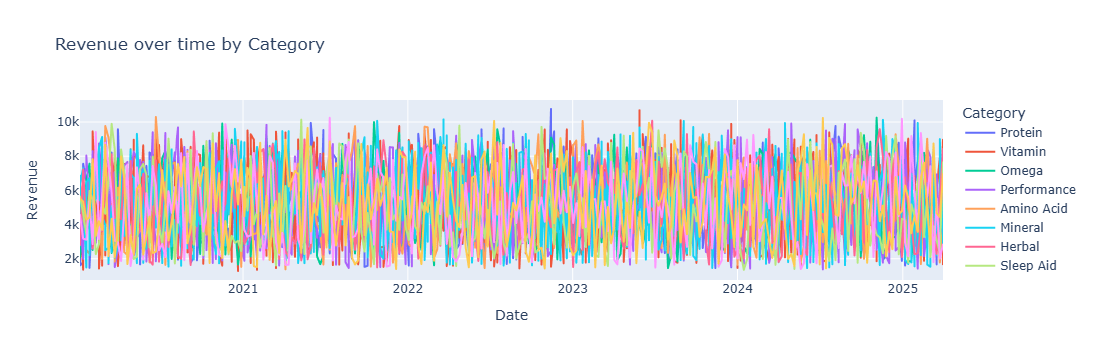

In [146]:
fig = px.line(df,x='Date',y='Revenue',color='Category',title='Revenue over time by Category')
fig.show()

In [105]:
# Monthly Sales Aggregation

df['Date'] = pd.to_datetime(df['Date'])

df['Monthly'] = df['Date'].dt.to_period("M")
Monthly = df.groupby('Monthly').agg({
    'Revenue' : 'sum',
    'Units Sold':'sum',
    'Discount':'mean',
    'Units Returned' : 'sum'
          
}).reset_index()

In [106]:
Monthly

,Monthly,Revenue,Units Sold,Discount,Units Returned
0,2020-01,290723.89,9547,0.120313,101
1,2020-02,355213.26,9493,0.128125,91
2,2020-03,416547.17,12145,0.111375,123
3,2020-04,326287.92,9605,0.138281,91
4,2020-05,333210.99,9557,0.119375,90
...,...,...,...,...,...
58,2024-11,329894.33,9838,0.117813,106
59,2024-12,446728.99,12042,0.127125,99
60,2025-01,304965.15,9617,0.125156,92
61,2025-02,341768.25,9542,0.128125,103


# Monthly Trend Visualization

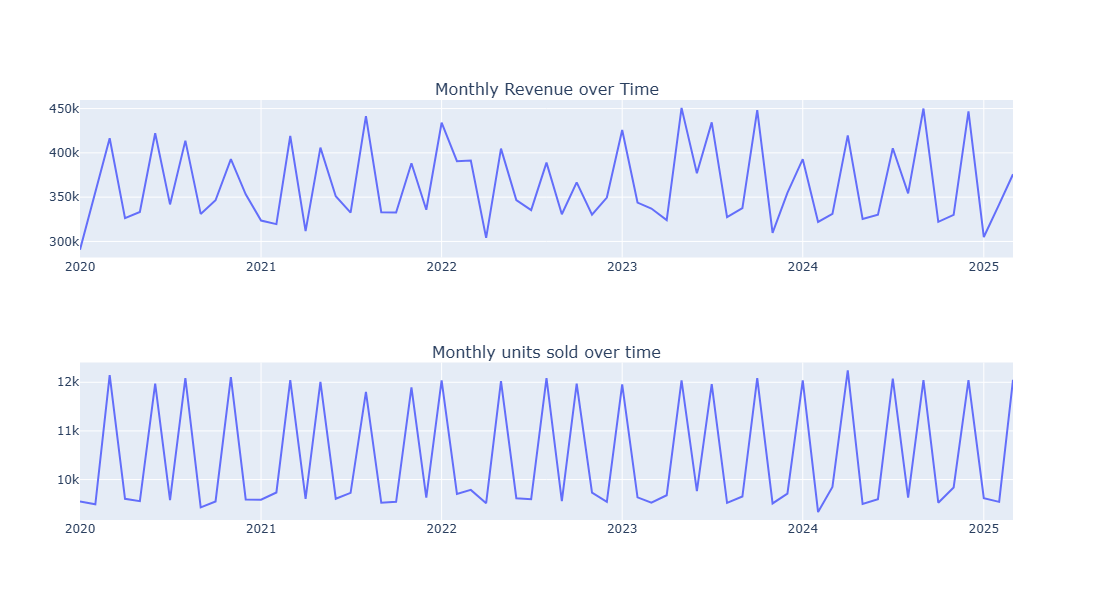

In [120]:
from plotly.subplots import make_subplots
import plotly.express as px
fig = make_subplots(rows=2,cols=1,subplot_titles=('Monthly Revenue over Time','Monthly units sold over time'))
fig.add_trace(px.line(Monthly,x='Monthly',y='Revenue').data[0],row=1,col=1)
fig.add_trace(px.line(Monthly,x='Monthly',y='Units Sold').data[0],row=2,col=1)
fig.update_layout(height=600, showlegend=False)
fig.show()


In [127]:
# Net Revenue Calculation

df['Net Revenue'] = df['Revenue'] - (df['Units Returned'] * df['Price']).round(2)

In [129]:
# Net Revenue by Category

category_profit = df.groupby('Category')['Net Revenue'].sum().sort_values(ascending=False)

In [131]:
category_profit

Category
Vitamin        4255337.22
Mineral        4233108.50
Performance    2879997.43
Protein        2827040.48
Amino Acid     1449514.18
Omega          1436916.36
Fat Burner     1426130.43
Hydration      1396778.95
Herbal         1392349.37
Sleep Aid      1383401.64
Name: Net Revenue, dtype: float64

# Revenue by Category

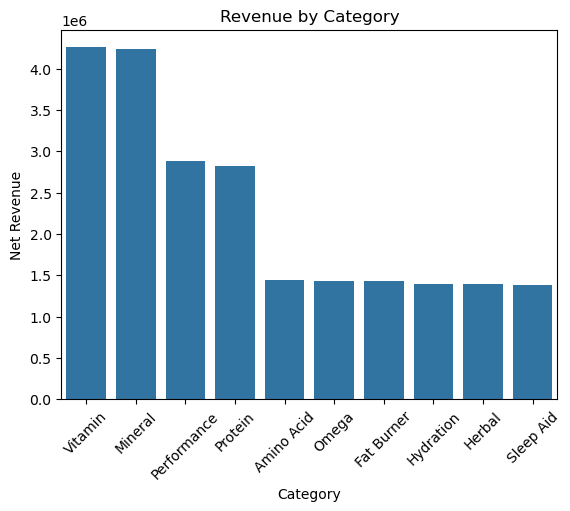

In [138]:
sns.barplot(x= category_profit.index,y=category_profit.values)
plt.xticks(rotation = 45)
plt.ylabel("Net Revenue")
plt.xlabel("Category")
plt.title('Revenue by Category')
plt.show()

#    **Conclusion :**

#### ****This exploratory data analysis provides deep insights into sales performance, customer returns, category profitability, platform efficiency, and seasonal trends, enabling data-driven business decisions for supplement sales optimization.****